In [11]:
%pip install -q --upgrade kaist-or-gym

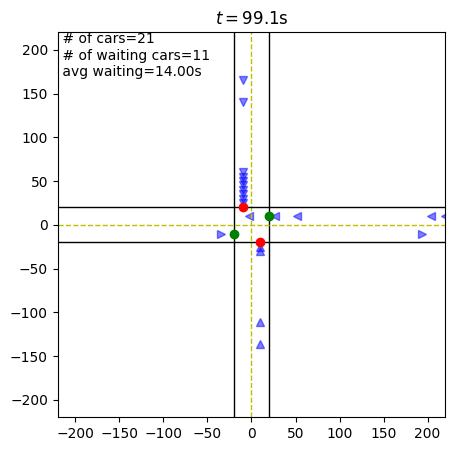

14.287096774193646

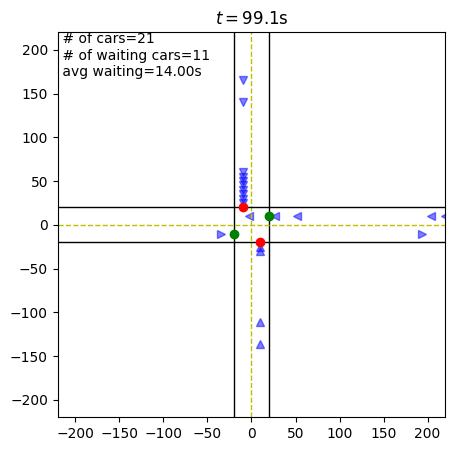

In [12]:
import gymnasium as gym
import kaist_or_gym

dt = 0.1
env = gym.make("kaist-or/TrafficControlEnv-v0", render_mode="human")

def simulate(env, traffic_intervals={1: 40, 2:80}, num_steps=6000):
    env.reset()
    action = 1
    cumulative_time = 0.0
    for i in range(num_steps):
        if cumulative_time > traffic_intervals[action]:
            cumulative_time = 0.0
            action = 1 if action == 2 else 2
        else:
            cumulative_time += 1.0 * dt

        observation, reward, terminated, truncated, info = env.step(action)
        if i % 10 == 0: # Render every 10 steps for efficiency
            env.render()
    return env.unwrapped.get_avg_waiting_time()

simulate(env, num_steps=1000)

Simulate the system with 40 sec green light and with 72 sec green light, and create gif images ('before.gif' and 'after.gif')

In [9]:
import numpy as np
from tqdm import tqdm

env = gym.make("kaist-or/TrafficControlEnv-v0", render_mode=None)


S = 20

xs = np.linspace(40, 90, 16)
avg_ws = np.zeros((len(xs), S))

for i, x in tqdm(enumerate(xs), total = len(xs)):
    traffic_intervals = {1: x, 2: 120 - x}
    for s in range(S):
        avg_ws[i][s] = simulate(env, traffic_intervals=traffic_intervals, num_steps=6000)

100%|██████████| 16/16 [01:01<00:00,  3.81s/it]


Plot the simulated results with theoretical prediction:

Text(0, 0.5, 'Average delay in travel time [s]')

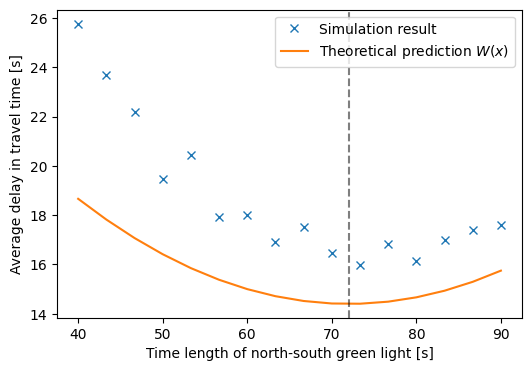

In [10]:
import numpy as np
from matplotlib import pyplot

Ws = np.zeros( len(xs) )
for i,x in enumerate(xs):
    pass_ns = x
    pass_we = 120 - x
    total_period = 120

    theo_ns = 0.5 * (total_period - pass_ns)**2 / total_period
    theo_we = 0.5 * (total_period - pass_we)**2 / total_period

    arrival_rates = np.array([env.unwrapped.arrival_rates[key] for key in ["N", "E", "S", "W"]])
    Ws[i] = arrival_rates.dot( (theo_ns, theo_we, theo_ns, theo_we) ) / arrival_rates.sum()

pyplot.close()
pyplot.figure( figsize=(6,4) )
pyplot.plot( xs, avg_ws.mean(axis=1), 'x', label="Simulation result" )
pyplot.plot( xs, Ws, '-', label=r"Theoretical prediction $W(x)$" )
pyplot.axvline( x=72, c='k', ls='--', alpha=0.5 )
pyplot.legend(loc='best')
pyplot.xlabel( "Time length of north-south green light [s]")
pyplot.ylabel( "Average delay in travel time [s]" )